In [5]:
import sys
import os

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.config import settings

# Set up TensorFlow to avoid common warnings/issues
# This is often useful in notebooks
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
# Initialize the Blackjack environment
# sab=True means 'stands on all 17s' which is the typical Vegas rule.
env = gym.make("Blackjack-v1", sab=True)
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

state_size = settings.STATE_SIZE # From settings.py, which is 3
num_actions = settings.NUM_ACTIONS # From settings.py, which is 2 (Hit, Stand)
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

# Create models directory if it doesn't exist
os.makedirs("models", exist_ok=True)

Observation space: Tuple(Discrete(32), Discrete(11), Discrete(2))
Action space: Discrete(2)
Derived state size: 3, number of actions: 2


In [8]:
print("--- Training DQN Agent ---")

# Initialize with default parameters from settings.py
dqn_agent = DQNAgent(state_size=state_size, num_actions=num_actions)

# Define training parameters for the .fit method
training_params = {
    "num_episodes": 50000,
    "batch_size": 64,
    "log_interval": 2500
}

# Start training
print(f"Starting DQN training for {training_params['num_episodes']} episodes...")
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass params using **kwargs
print("DQN training complete.")

# Save the trained model weights
dqn_agent.save_weights('models/dqn_blackjack.weights.h5')

--- Training DQN Agent ---
Starting DQN training for 50000 episodes...
Episode 2500/50000, Avg Reward (last 2500): -0.0900, Epsilon: 0.010
Episode 5000/50000, Avg Reward (last 2500): -0.0856, Epsilon: 0.010
Episode 7500/50000, Avg Reward (last 2500): -0.0660, Epsilon: 0.010
Episode 10000/50000, Avg Reward (last 2500): -0.0680, Epsilon: 0.010
Episode 12500/50000, Avg Reward (last 2500): -0.0648, Epsilon: 0.010
Episode 15000/50000, Avg Reward (last 2500): -0.0488, Epsilon: 0.010
Episode 17500/50000, Avg Reward (last 2500): -0.0604, Epsilon: 0.010
Episode 20000/50000, Avg Reward (last 2500): -0.0744, Epsilon: 0.010
Episode 22500/50000, Avg Reward (last 2500): -0.0852, Epsilon: 0.010
Episode 25000/50000, Avg Reward (last 2500): -0.0540, Epsilon: 0.010
Episode 27500/50000, Avg Reward (last 2500): -0.0732, Epsilon: 0.010
Episode 30000/50000, Avg Reward (last 2500): -0.0412, Epsilon: 0.010
Episode 32500/50000, Avg Reward (last 2500): -0.0572, Epsilon: 0.010
Episode 35000/50000, Avg Reward (la

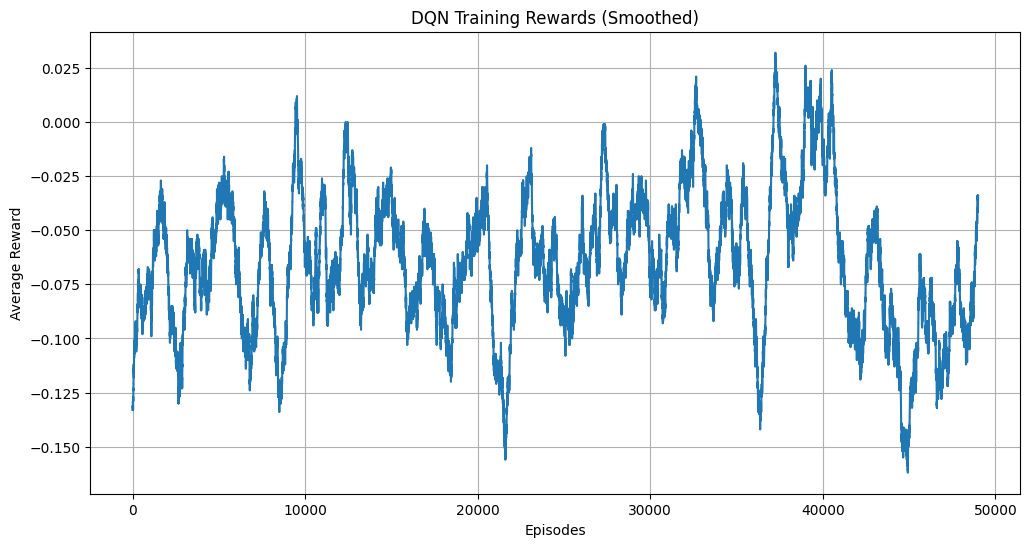

In [9]:
from src.utils.helpers import smooth

# Plotting the smoothed rewards
plt.figure(figsize=(12, 6))
plt.plot(smooth(dqn_rewards_history, w=1000)) # Use a smoothing window, e.g., 1000 episodes
plt.title("DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [10]:
print("\n--- Evaluating DQN Agent ---")

# Load the trained DQN agent for evaluation
eval_dqn_agent = DQNAgent(state_size=state_size, num_actions=num_actions)
eval_dqn_agent.load_weights('models/dqn_blackjack.weights.h5')

# Define evaluation parameters
from src.utils.helpers import evaluate_agent_in_notebook
num_evaluation_episodes = 10000

dqn_win_rate, dqn_push_rate, dqn_loss_rate = evaluate_agent_in_notebook(eval_dqn_agent, env, num_evaluation_episodes)


--- Evaluating DQN Agent ---
DQN model weights loaded from models/dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...
  Evaluation episode 1000/10000
  Evaluation episode 2000/10000
  Evaluation episode 3000/10000
  Evaluation episode 4000/10000
  Evaluation episode 5000/10000
  Evaluation episode 6000/10000
  Evaluation episode 7000/10000
  Evaluation episode 8000/10000
  Evaluation episode 9000/10000
  Evaluation episode 10000/10000

--- Evaluation Results ---
Total Episodes: 10000
Wins: 4296 (42.96%)
Pushes: 906 (9.06%)
Losses: 4798 (47.98%)
--------------------------


In [ ]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(state_size=state_size, num_actions=num_actions)

# You can reuse training_params or define new ones
print(f"Starting Double DQN training for {training_params['num_episodes']} episodes...")
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)
print("Double DQN training complete.")

# Save the trained model weights
double_dqn_agent.save_weights('models/double_dqn_blackjack.weights.h5')


--- Training Double DQN Agent ---
DoubleDQNAgent initialized.
Starting Double DQN training for 50000 episodes...
Episode 2500/50000, Avg Reward (last 2500): -0.1188, Epsilon: 0.010
Episode 5000/50000, Avg Reward (last 2500): -0.0696, Epsilon: 0.010
Episode 7500/50000, Avg Reward (last 2500): -0.0624, Epsilon: 0.010
Episode 10000/50000, Avg Reward (last 2500): -0.0484, Epsilon: 0.010
Episode 12500/50000, Avg Reward (last 2500): -0.0732, Epsilon: 0.010
Episode 15000/50000, Avg Reward (last 2500): -0.1156, Epsilon: 0.010
Episode 17500/50000, Avg Reward (last 2500): -0.0716, Epsilon: 0.010
Episode 20000/50000, Avg Reward (last 2500): -0.0520, Epsilon: 0.010
Episode 22500/50000, Avg Reward (last 2500): -0.0316, Epsilon: 0.010
Episode 25000/50000, Avg Reward (last 2500): -0.0180, Epsilon: 0.010
Episode 27500/50000, Avg Reward (last 2500): -0.0688, Epsilon: 0.010
Episode 30000/50000, Avg Reward (last 2500): -0.0188, Epsilon: 0.010
Episode 32500/50000, Avg Reward (last 2500): -0.0892, Epsilon

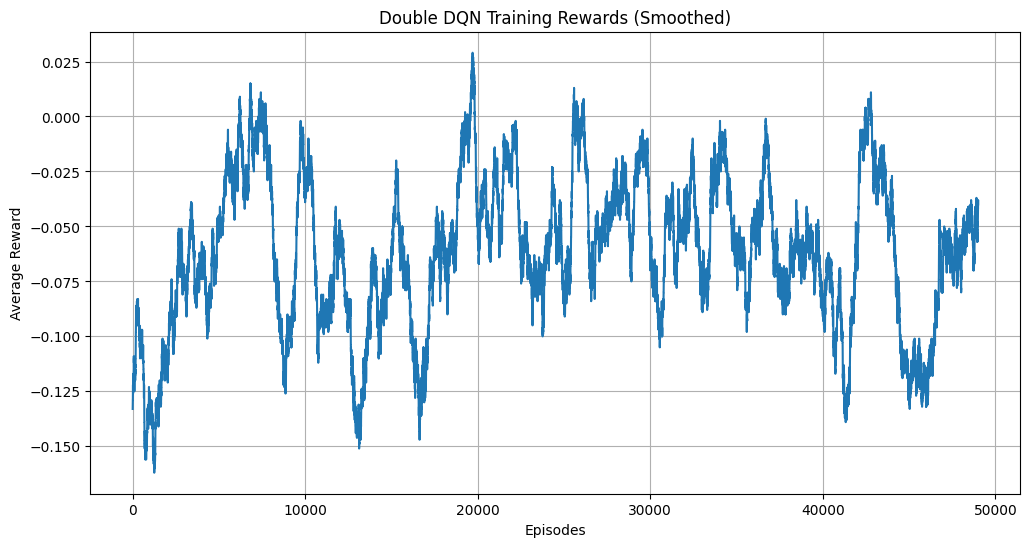

In [ ]:
if 'double_dqn_rewards_history' in locals():
    plt.figure(figsize=(12, 6))
    plt.plot(smooth(double_dqn_rewards_history, w=1000))
    plt.title("Double DQN Training Rewards (Smoothed)")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.grid(True)
    plt.show()

In [ ]:
if 'double_dqn_rewards_history' in locals():
    print("\n--- Evaluating Double DQN Agent ---")

    eval_double_dqn_agent = DoubleDQNAgent(state_size=state_size, num_actions=num_actions)
    eval_double_dqn_agent.load_weights('models/double_dqn_blackjack.weights.h5')

    double_dqn_win_rate, double_dqn_push_rate, double_dqn_loss_rate = evaluate_agent_in_notebook(eval_double_dqn_agent, env, num_evaluation_episodes)


--- Evaluating Double DQN Agent ---
DoubleDQNAgent initialized.
DQN model weights loaded from models/double_dqn_blackjack.weights.h5
Starting evaluation for 10000 episodes...
  Evaluation episode 1000/10000
  Evaluation episode 2000/10000
  Evaluation episode 3000/10000
  Evaluation episode 4000/10000
  Evaluation episode 5000/10000
  Evaluation episode 6000/10000
  Evaluation episode 7000/10000
  Evaluation episode 8000/10000
  Evaluation episode 9000/10000
  Evaluation episode 10000/10000

--- Evaluation Results ---
Total Episodes: 10000
Wins: 4298 (42.98%)
Pushes: 877 (8.77%)
Losses: 4825 (48.25%)
--------------------------


In [ ]:
env.close()
print("Environment closed.")

Environment closed.
